## Step 1: Load and dataframe creation.

In [ ]:
from google.colab import files
data = files.upload()

Saving Historical Alarm Cases.xlsx to Historical Alarm Cases.xlsx


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Historical Alarm Cases.xlsx')

## Step 2: Checking the Dataset

In [ ]:
df.head()

,Case No.,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1),Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Case # 1,-2,226,1,96,9,21,1,NaN,NaN,NaN
1,Case # 2,4,134,1,83,4,77,0,NaN,NaN,NaN
2,Case # 3,7,163,0,69,2,81,0,NaN,NaN,NaN
3,Case # 4,5,162,0,80,6,69,0,NaN,NaN,NaN
4,Case # 5,2,192,1,87,3,67,0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Case No.                            1892 non-null   object 
 1   Ambient Temperature( deg C)         1892 non-null   int64  
 2   Calibration(days)                   1892 non-null   int64  
 3   Unwanted substance deposition(0/1)  1892 non-null   int64  
 4   Humidity(%)                         1892 non-null   int64  
 5   H2S Content(ppm)                    1892 non-null   int64  
 6   detected by(% of sensors)           1892 non-null   int64  
 7   Spuriosity Index(0/1)               1892 non-null   int64  
 8   Unnamed: 8                          0 non-null      float64
 9   Unnamed: 9                          0 non-null      float64
 10  Unnamed: 10                         1 non-null      float64
dtypes: float64(3), int64(7), object(1)
memory u

## Step 3: EDA

In [ ]:
import seaborn as sns

<Axes: xlabel='Spuriosity Index(0/1)', ylabel='count'>

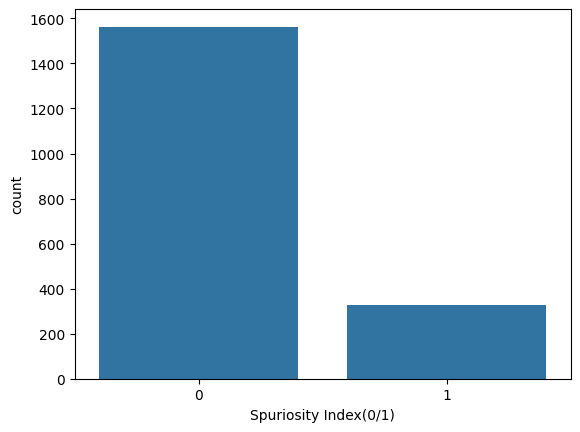

In [ ]:
sns.countplot(x= 'Spuriosity Index(0/1)', data = df)

In [ ]:
df['Spuriosity Index(0/1)'].value_counts()

Spuriosity Index(0/1)
0    1563
1     329
Name: count, dtype: int64

* Note: Here, 0-True Alarm & 1-False Alarm (Mentioned in Historical Alarm Cases.xlsx)

## Step 4: Data Cleaning

* Since null values are found in Unnamed 8, 9 & 10 columns. Also it has very few to negligible count of non-null values, hence can be dropped.
* Case no. column is not relevant either as it's indicating indexes or serial no. only, hence can be dropped.

In [ ]:
df.drop(['Unnamed: 8',	'Unnamed: 9',	'Unnamed: 10', 'Case No.'], axis= 1, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Ambient Temperature( deg C)         1892 non-null   int64
 1   Calibration(days)                   1892 non-null   int64
 2   Unwanted substance deposition(0/1)  1892 non-null   int64
 3   Humidity(%)                         1892 non-null   int64
 4   H2S Content(ppm)                    1892 non-null   int64
 5   detected by(% of sensors)           1892 non-null   int64
 6   Spuriosity Index(0/1)               1892 non-null   int64
dtypes: int64(7)
memory usage: 103.6 KB


In [ ]:
df.corr()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
Ambient Temperature( deg C),1.000000,0.104659,-0.036992,-0.105782,0.053588,-0.049475,0.048690
Calibration(days),0.104659,1.000000,-0.011956,0.061244,-0.021214,0.001081,-0.011579
Unwanted substance deposition(0/1),-0.036992,-0.011956,1.000000,-0.010367,0.019841,-0.008420,-0.001640
Humidity(%),-0.105782,0.061244,-0.010367,1.000000,0.018789,-0.001910,0.011318
H2S Content(ppm),0.053588,-0.021214,0.019841,0.018789,1.000000,-0.009165,0.004233
detected by(% of sensors),-0.049475,0.001081,-0.008420,-0.001910,-0.009165,1.000000,-0.849136
Spuriosity Index(0/1),0.048690,-0.011579,-0.001640,0.011318,0.004233,-0.849136,1.000000


In [ ]:
df.corr()['Spuriosity Index(0/1)']*100

Ambient Temperature( deg C)             4.869033
Calibration(days)                      -1.157896
Unwanted substance deposition(0/1)     -0.164028
Humidity(%)                             1.131813
H2S Content(ppm)                        0.423267
detected by(% of sensors)             -84.913608
Spuriosity Index(0/1)                 100.000000
Name: Spuriosity Index(0/1), dtype: float64

* Here, correlation with Spuriosity Index(0/1) is formed majorly with:
  * detected by(% of sensors) : 84.91%
  * Ambient Temperature( deg C) : 4.86%
* Note: -ve sign in corr percentage is due to the inverted convention (i.e., 0-True Alarm & 1-False Alarm.)
* Rest of the columns having very small correlations.

## Step 5: Preprocessing the dataset

In [ ]:
df.mean()

Ambient Temperature( deg C)             3.449789
Calibration(days)                     131.633192
Unwanted substance deposition(0/1)      0.482030
Humidity(%)                            82.513214
H2S Content(ppm)                        5.532241
detected by(% of sensors)              71.610465
Spuriosity Index(0/1)                   0.173890
dtype: float64

* Since the mean values of the given columns are spread wide apart. Hence it needs to be standardized.

In [ ]:
X = df.drop('Spuriosity Index(0/1)', axis= 1)
y = df['Spuriosity Index(0/1)']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

## Step 6: Building a Logistic Regression model

### Step 6.1: Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=40)

* Checking the split:

In [ ]:
X_train.shape

(1324, 6)

In [ ]:
y_test.shape

(568,)

### Step 6.2: Training & Predicting the Model.

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logmodel.predict(X_test)

## Step 7: Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('The Accuracy score: ', accuracy_score(y_test, y_pred)*100)

The Accuracy score:  99.64788732394366


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       0.98      1.00      0.99        93

    accuracy                           1.00       568
   macro avg       0.99      1.00      0.99       568
weighted avg       1.00      1.00      1.00       568



## Step 8: Predictions for New Data

### Step 8.1: Loading the New Dataset

In [ ]:
from google.colab import files
json_file = files.upload()

Saving JSON_test_data.txt to JSON_test_data.txt


In [ ]:
new_data = pd.read_json('JSON_test_data.txt', lines=True)

In [ ]:
new_data

,Ambient Temperature,Calibration,Unwanted substance deposition,Humidity,H2S Content,detected by
0,7,57,0,90,7,38
1,4,134,1,83,4,77


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Ambient Temperature            2 non-null      int64
 1   Calibration                    2 non-null      int64
 2   Unwanted substance deposition  2 non-null      int64
 3   Humidity                       2 non-null      int64
 4   H2S Content                    2 non-null      int64
 5   detected by                    2 non-null      int64
dtypes: int64(6)
memory usage: 224.0 bytes


### Step 8.2: Scaling the New Data

In [ ]:
new_data.mean()

Ambient Temperature               5.5
Calibration                      95.5
Unwanted substance deposition     0.5
Humidity                         86.5
H2S Content                       5.5
detected by                      57.5
dtype: float64

In [ ]:
new_data_scaled = scaler.fit_transform(new_data)

### Step 8.3: Predictions for the new data

In [ ]:
predictions = logmodel.predict(new_data_scaled)
print("Predictions for new data:", predictions)

Predictions for new data: [1 0]


Here, as per the given convention:

* First set of json is predicted as 1 i.e., False Alarm.
* Second set of json is predicted as 0 i.e., True Alarm.

In [ ]:
predictions

array([1, 0])

In [ ]:
for prediction in predictions:
  if prediction == 1:
    print(f"Prediction indicates {prediction}: No Leakage...")
  else:
    print(f"Prediction indicates {prediction}: DANGER !!! LEAKAGE DETECTED !!!")

Prediction indicates 1: No Leakage...
Prediction indicates 0: DANGER !!! LEAKAGE DETECTED !!!
